In [428]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [429]:
census = pd.read_csv('census_data.csv')

In [430]:
census

,age,workclass,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [431]:
def label_fix(label):
    if label==' <=50K':
        return 0
    else:
        return 1

In [432]:
census['income_bracket'] = census['income_bracket'].apply(label_fix)

In [433]:
#census['income_bracket'] = census['income_bracket'].map({' <=50K':'0',' >50K':'1'})

In [434]:
len(census['capital_loss'].value_counts())

92

In [435]:
import seaborn as sns

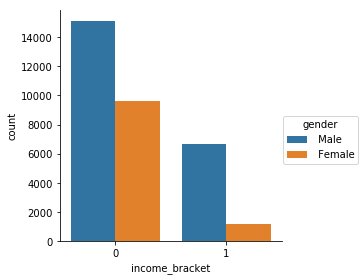

In [436]:

sns.factorplot('income_bracket',data=census,hue='gender',kind='count')

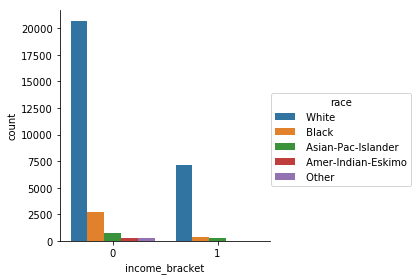

In [437]:
sns.factorplot('income_bracket',data=census,hue='race',kind='count')

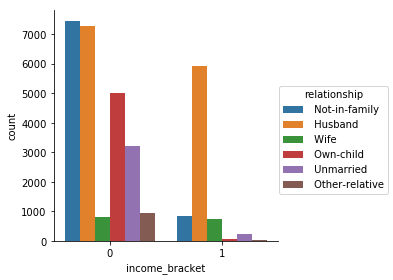

In [438]:
sns.factorplot('income_bracket',data=census,hue='relationship',kind='count')

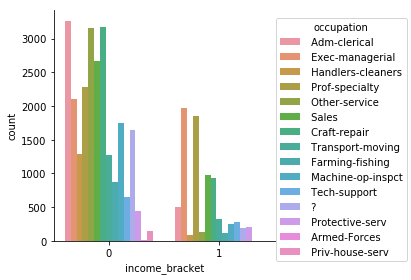

In [439]:
sns.factorplot('income_bracket',data=census,hue='occupation',kind='count')

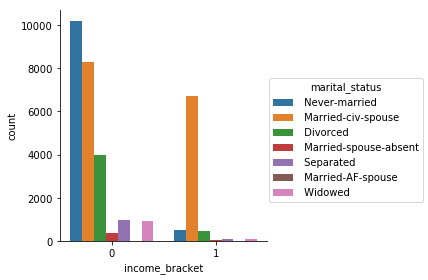

In [440]:
sns.factorplot('income_bracket',data=census,hue='marital_status',kind='count')

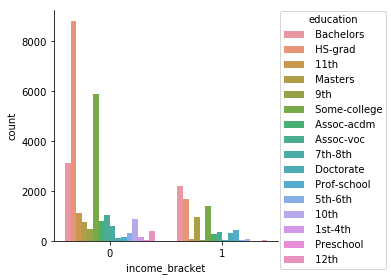

In [441]:
sns.factorplot('income_bracket',data=census,hue='education',kind='count')

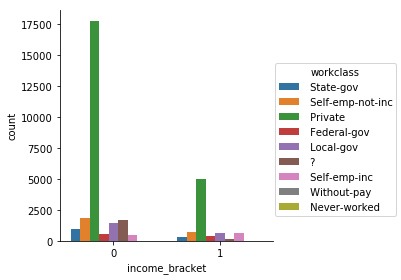

In [442]:
sns.factorplot('income_bracket',data=census,hue='workclass',kind='count')

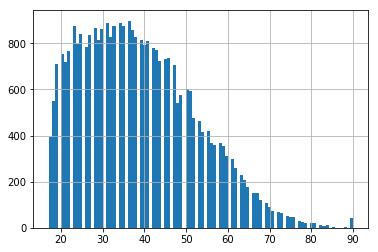

In [443]:
census['age'].hist(bins=100)

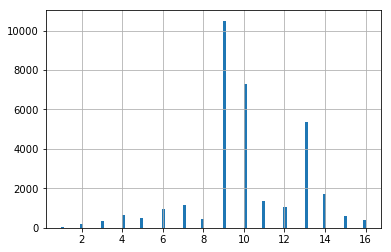

In [444]:
census['education_num'].hist(bins=100)

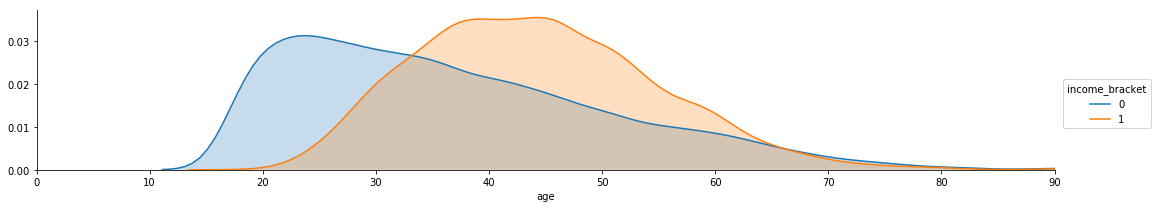

In [445]:
as_fig = sns.FacetGrid(census,hue='income_bracket',aspect=5)

as_fig.map(sns.kdeplot,'age',shade=True)

oldest = census['age'].max()

as_fig.set(xlim=(0,oldest))

as_fig.add_legend()

In [446]:
census.columns

Index(['age', 'workclass', 'education', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'gender', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'income_bracket'],
      dtype='object')

Specifying input to the model as feature columns. 
Check out the tutorial here : https://www.tensorflow.org/versions/master/get_started/feature_columns#feature_columns_1  
There are different ways of specifying feature columns based on the feature. In practice, hashing is the best practice for converting the input columns to feature columns of Estimator API.

In [447]:
age = tf.feature_column.numeric_column('age')
capital_gain = tf.feature_column.numeric_column('capital_gain')
capital_loss = tf.feature_column.numeric_column('capital_loss')
hours_per_week = tf.feature_column.numeric_column('hours_per_week')
education_num = tf.feature_column.numeric_column('education_num')

In [448]:
bucket_age_fc = tf.feature_column.bucketized_column(age,boundaries=[10,20,30,40,50,60,70,80,90])


In [449]:
bucket_education_num_fc = tf.feature_column.bucketized_column(education_num,boundaries=[2,4,6,8,10,12,14,16])

In [450]:
workclass = tf.feature_column.categorical_column_with_hash_bucket("workclass",hash_bucket_size=1000)
education = tf.feature_column.categorical_column_with_hash_bucket("education",hash_bucket_size=1000)
marital_status = tf.feature_column.categorical_column_with_hash_bucket("marital_status",hash_bucket_size=1000)
occupation = tf.feature_column.categorical_column_with_hash_bucket("occupation",hash_bucket_size=1000)
relationship = tf.feature_column.categorical_column_with_hash_bucket("relationship",hash_bucket_size=1000)
gender = tf.feature_column.categorical_column_with_vocabulary_list("gender",vocabulary_list=["Male","Female"])
native_country = tf.feature_column.categorical_column_with_hash_bucket("native_country",hash_bucket_size=1000)

In [451]:
census['hours_per_week'].value_counts().index

Int64Index([40, 50, 45, 60, 35, 20, 30, 55, 25, 48, 38, 15, 70, 10, 32, 24, 65,
            36, 42, 44, 16, 12, 43, 37,  8, 52, 80, 56, 28, 99, 46, 18, 72, 75,
             6,  5,  4, 47, 84, 22, 54,  3, 33, 39, 41, 14,  2, 27, 26, 17, 49,
            90, 58, 34,  7, 53, 21, 13, 23,  1, 62,  9, 66, 57, 19, 64, 51, 85,
            68, 98, 11, 63, 78, 29, 77, 59, 31, 96, 67, 91, 76, 81, 73, 89, 97,
            88, 86, 61, 95, 92, 94, 87, 74, 82],
           dtype='int64')

In [452]:
feat_cols = [gender,occupation,marital_status,relationship,education,workclass,native_country,
            age,education_num,capital_gain,capital_loss,hours_per_week]

#[capital_gain_fc,capital_loss_fc,hours_per_week_fc,bucket_age_fc,bucket_education_num_fc,workclass_fc,
           #  education_fc,marital_status_fc,occupation_fc,relationship_fc,race_fc,gender_fc,native_country_fc]

In [453]:
len(feat_cols)

12

In [454]:
x_data = census.drop('income_bracket',axis=1)
y_data = census['income_bracket']

In [455]:
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data,test_size = 0.3, random_state = 101)

In [476]:
train_input_func = tf.estimator.inputs.pandas_input_fn(x=x_train,y=y_train,num_epochs=None,batch_size=10,shuffle=True)

In [477]:
lin_model = tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_keep_checkpoint_max': 5, '_save_summary_steps': 100, '_tf_random_seed': 1, '_save_checkpoints_secs': 600, '_keep_checkpoint_every_n_hours': 10000, '_session_config': None, '_save_checkpoints_steps': None, '_model_dir': 'C:\\Users\\mamid\\AppData\\Local\\Temp\\tmpevh45swx', '_log_step_count_steps': 100}


In [478]:
lin_model.train(input_fn=train_input_func,steps=5000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\mamid\AppData\Local\Temp\tmpevh45swx\model.ckpt.
INFO:tensorflow:step = 1, loss = 6.93147
INFO:tensorflow:global_step/sec: 270.673
INFO:tensorflow:step = 101, loss = 66.1391 (0.375 sec)
INFO:tensorflow:global_step/sec: 308.297
INFO:tensorflow:step = 201, loss = 25.0298 (0.324 sec)
INFO:tensorflow:global_step/sec: 306.874
INFO:tensorflow:step = 301, loss = 171.541 (0.323 sec)
INFO:tensorflow:global_step/sec: 315.115
INFO:tensorflow:step = 401, loss = 5.93346 (0.318 sec)
INFO:tensorflow:global_step/sec: 232.752
INFO:tensorflow:step = 501, loss = 255.467 (0.436 sec)
INFO:tensorflow:global_step/sec: 172.401
INFO:tensorflow:step = 601, loss = 46.8344 (0.585 sec)
INFO:tensorflow:global_step/sec: 167.339
INFO:tensorflow:step = 701, loss = 35.1257 (0.590 sec)
INFO:tensorflow:global_step/sec: 191.796
INFO:tensorflow:step = 801, loss = 9.26761 (0.523 sec)
INFO:tensorflow:global_step/sec: 310.217
IN

In [479]:
pred_func = tf.estimator.inputs.pandas_input_fn(x=x_test,batch_size=10,num_epochs=1,shuffle=False)

In [480]:
predictions = lin_model.predict(input_fn=pred_func)

In [481]:
fin_preds = []
for pred in predictions:
    fin_preds.append(pred['class_ids'])
    

INFO:tensorflow:Restoring parameters from C:\Users\mamid\AppData\Local\Temp\tmpevh45swx\model.ckpt-5000


In [482]:
list(predictions)

[]

In [483]:
final_predictions = []
for i in range(len(fin_preds)):
    
    final_predictions.append(fin_preds[i][0])

In [484]:
report = classification_report(y_test,final_predictions)

In [485]:
print(report)

             precision    recall  f1-score   support

          0       0.84      0.94      0.89      7436
          1       0.70      0.42      0.53      2333

avg / total       0.81      0.82      0.80      9769



In [486]:
len(census['native_country'].value_counts())

42

In [487]:
embedded_workclass = tf.feature_column.embedding_column(workclass,dimension=9)
embedded_education = tf.feature_column.embedding_column(education,dimension=16)
embedded_marital_status = tf.feature_column.embedding_column(marital_status,dimension=7)
embedded_occupation = tf.feature_column.embedding_column(occupation,dimension=15)
embedded_relationship = tf.feature_column.embedding_column(relationship,dimension=6)
embedded_gender = tf.feature_column.embedding_column(gender,dimension=2)
embedded_native_country = tf.feature_column.embedding_column(native_country,dimension=42)

In [488]:
dnn_feat_cols = [embedded_gender,embedded_occupation,embedded_marital_status,embedded_relationship,embedded_education,embedded_workclass,embedded_native_country,
            age,education_num,capital_gain,capital_loss,hours_per_week]

In [489]:
len(dnn_feat_cols)

12

In [490]:
dnn_model = tf.estimator.DNNClassifier(feature_columns=dnn_feat_cols,hidden_units=[12,12,12,12],n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_keep_checkpoint_max': 5, '_save_summary_steps': 100, '_tf_random_seed': 1, '_save_checkpoints_secs': 600, '_keep_checkpoint_every_n_hours': 10000, '_session_config': None, '_save_checkpoints_steps': None, '_model_dir': 'C:\\Users\\mamid\\AppData\\Local\\Temp\\tmpv7r8vfmb', '_log_step_count_steps': 100}


In [491]:
dnn_model.train(input_fn=train_input_func,steps=5000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\mamid\AppData\Local\Temp\tmpv7r8vfmb\model.ckpt.
INFO:tensorflow:step = 1, loss = 234.177
INFO:tensorflow:global_step/sec: 262.459
INFO:tensorflow:step = 101, loss = 5.60311 (0.384 sec)
INFO:tensorflow:global_step/sec: 323.811
INFO:tensorflow:step = 201, loss = 6.4223 (0.311 sec)
INFO:tensorflow:global_step/sec: 275.89
INFO:tensorflow:step = 301, loss = 4.88165 (0.360 sec)
INFO:tensorflow:global_step/sec: 330.793
INFO:tensorflow:step = 401, loss = 8.4811 (0.303 sec)
INFO:tensorflow:global_step/sec: 243.551
INFO:tensorflow:step = 501, loss = 3.38306 (0.419 sec)
INFO:tensorflow:global_step/sec: 178.097
INFO:tensorflow:step = 601, loss = 9.65806 (0.555 sec)
INFO:tensorflow:global_step/sec: 183.166
INFO:tensorflow:step = 701, loss = 1.48386 (0.549 sec)
INFO:tensorflow:global_step/sec: 188.712
INFO:tensorflow:step = 801, loss = 1.57216 (0.531 sec)
INFO:tensorflow:global_step/sec: 200.269
INFO:

In [492]:
dnn_preds = dnn_model.predict(input_fn=pred_func)

In [493]:
dnn_predictions = []
for pred in dnn_preds:
    
    dnn_predictions.append(pred['class_ids'])
    
    

INFO:tensorflow:Restoring parameters from C:\Users\mamid\AppData\Local\Temp\tmpv7r8vfmb\model.ckpt-5000


In [494]:
final_dnn_predictions = []
for i in range(len(dnn_predictions)):
    
    final_dnn_predictions.append(dnn_predictions[i][0])

In [495]:
print("DNN Classification report is \n", classification_report(y_test,final_dnn_predictions))

DNN Classification report is 
              precision    recall  f1-score   support

          0       0.88      0.93      0.91      7436
          1       0.73      0.61      0.66      2333

avg / total       0.85      0.85      0.85      9769



From the Linear and Dense Neural Network model, DNN model performs better than the simple linear model.